# Import


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

# Прочитать данные

In [2]:
df = pd.read_csv(r'данные\train_1.csv', delimiter = ';')

C:\Users\artem\AppData\Local\Temp\ipykernel_21664\864136257.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'данные\train_1.csv', delimiter = ';')


In [3]:
df

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


# очистка

In [4]:
df.isna().sum()

ID                      0
PROD_TYPE               0
TRANS_DTTM              0
MCC_CODE                0
SUM_TRANS               0
LOCATION_NAME    10582071
dtype: int64

df.dropna()

In [5]:
df.drop('LOCATION_NAME', axis=1, inplace=True)

# Convert to int

df['Категория'] = pd.factorize(df['Категория'])[0]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ID          int64 
 1   PROD_TYPE   int64 
 2   TRANS_DTTM  object
 3   MCC_CODE    int64 
 4   SUM_TRANS   object
dtypes: int64(3), object(2)
memory usage: 490.0+ MB


In [7]:
df['TRANS_DTTM'] = df['TRANS_DTTM'].apply(lambda x : re.sub(r'..:..:..$','',x))

In [8]:
df

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS
0,500000001271933224,1,31.10.2021,5411,"411,45"
1,500000001089710588,2,20.08.2021,7311,503
2,500000000004725733,1,31.10.2021,5411,"119,24"
3,500000000608267511,2,31.10.2021,5411,"249,95"
4,500000001639102687,1,29.10.2021,5814,290
...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021,5411,1202
12845071,500000000002290038,1,09.08.2021,5411,955
12845072,500000000005033472,2,05.10.2021,5311,"1198,1"
12845073,500000000054330593,1,25.09.2021,5411,"435,74"


In [9]:
df['TRANS_DTTM'] = df['TRANS_DTTM'].apply(lambda x : re.sub(r' ','',x))

In [10]:
df['TRANS_DTTM'] = pd.to_datetime(df['TRANS_DTTM'], format='%d.%m.%Y')

df['Day'] = df['TRANS_DTTM'].dt.day
df['Month'] = df['TRANS_DTTM'].dt.month
df['Year'] = df['TRANS_DTTM'].dt.year
df.drop('TRANS_DTTM', axis=1, inplace=True)

In [11]:
df

,ID,PROD_TYPE,MCC_CODE,SUM_TRANS,Day,Month,Year
0,500000001271933224,1,5411,"411,45",31,10,2021
1,500000001089710588,2,7311,503,20,8,2021
2,500000000004725733,1,5411,"119,24",31,10,2021
3,500000000608267511,2,5411,"249,95",31,10,2021
4,500000001639102687,1,5814,290,29,10,2021
...,...,...,...,...,...,...,...
12845070,500000000054762689,2,5411,1202,3,7,2021
12845071,500000000002290038,1,5411,955,9,8,2021
12845072,500000000005033472,2,5311,"1198,1",5,10,2021
12845073,500000000054330593,1,5411,"435,74",25,9,2021


In [12]:
df['SUM_TRANS'] = df['SUM_TRANS'].apply(lambda x : re.sub(r',','.',x))

# Кластеризация

In [13]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)
scaled_X

array([[ 5.28715968e+08, -1.23819714e+00, -1.18548014e-01, ...,
         1.67719129e+00,  1.36844050e+00,  0.00000000e+00],
       [ 3.46493312e+08,  8.07625833e-01,  3.30616716e+00, ...,
         4.40471535e-01, -4.25694395e-01,  0.00000000e+00],
       [-7.38491520e+08, -1.23819714e+00, -1.18548014e-01, ...,
         1.67719129e+00,  1.36844050e+00,  0.00000000e+00],
       ...,
       [-7.38183808e+08,  8.07625833e-01, -2.98796182e-01, ...,
        -1.24596450e+00,  1.36844050e+00,  0.00000000e+00],
       [-6.88886656e+08, -1.23819714e+00, -1.18548014e-01, ...,
         1.00261688e+00,  4.71373054e-01,  0.00000000e+00],
       [-6.18704896e+08, -1.23819714e+00,  7.84495304e-01, ...,
        -1.21673809e-01,  4.71373054e-01,  0.00000000e+00]])

scaler - берет среднее значение столбца и сравнивает с всеми

In [14]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

создание модели и использование её на наших данных

In [15]:
df['Cluster'] = cluster_labels

добавление нового столбца с ID кластера

In [16]:
df

,ID,PROD_TYPE,MCC_CODE,SUM_TRANS,Day,Month,Year,Cluster
0,500000001271933224,1,5411,411.45,31,10,2021,0
1,500000001089710588,2,7311,503,20,8,2021,0
2,500000000004725733,1,5411,119.24,31,10,2021,0
3,500000000608267511,2,5411,249.95,31,10,2021,0
4,500000001639102687,1,5814,290,29,10,2021,1
...,...,...,...,...,...,...,...,...
12845070,500000000054762689,2,5411,1202,3,7,2021,0
12845071,500000000002290038,1,5411,955,9,8,2021,0
12845072,500000000005033472,2,5311,1198.1,5,10,2021,0
12845073,500000000054330593,1,5411,435.74,25,9,2021,0


<AxesSubplot:>

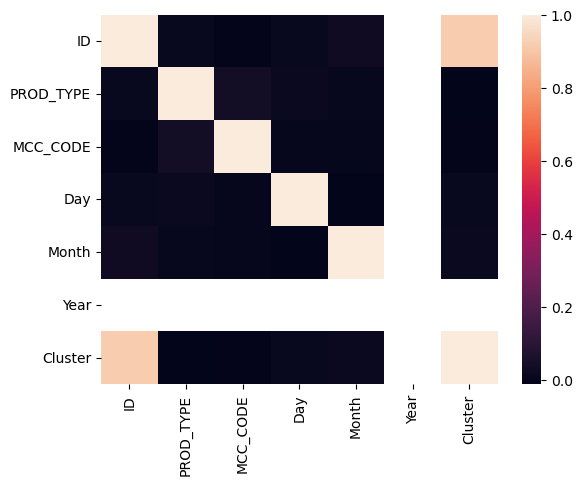

In [17]:
import seaborn as sns
sns.heatmap(df.corr())

визуализация зависимостей столбцов

In [18]:
df.corr()['Cluster']

ID           0.915190
PROD_TYPE   -0.008312
MCC_CODE    -0.007760
Day          0.007587
Month        0.017706
Year              NaN
Cluster      1.000000
Name: Cluster, dtype: float64

зависимость кластера от столбцов

<AxesSubplot:>

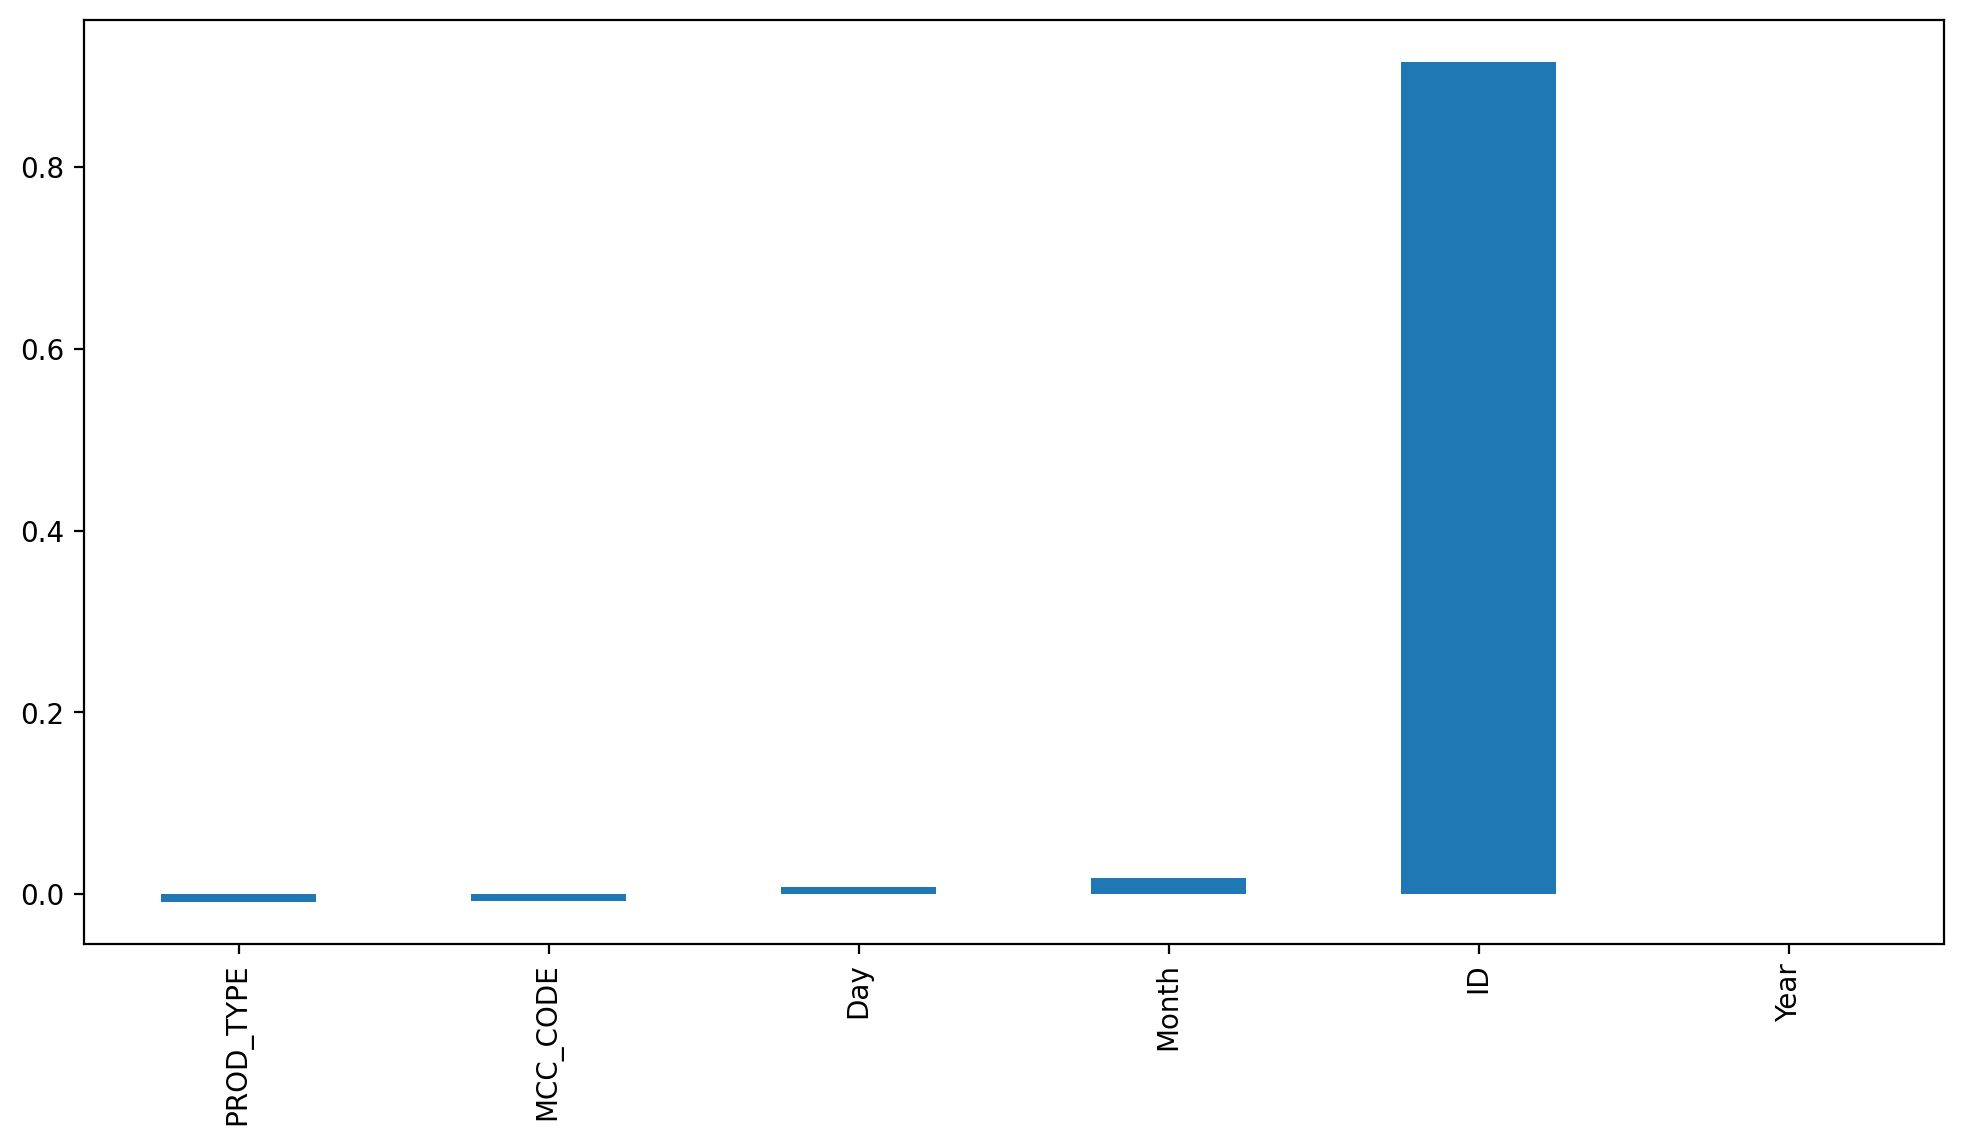

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6),dpi=200)
df.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

зависимость кластера от столбцов c визуализацией

In [ ]:
from tqdm import tqdm
ssd = []
for k in tqdm(range(2,10)):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

 25%|█████████████████████                                                               | 2/8 [01:22<04:16, 42.74s/it]

ssd это значение насколько близкие значения находятся в кластере/

In [ ]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

визуализация уменьшения SSD

In [ ]:
pd.Series(ssd).diff().plot(kind='bar')

визуализация изменения SSD с увеличением кластеров